<a href="https://colab.research.google.com/github/cpvr8877/Predicting-Salary-of-an-Employee-by-Polynomial-Regression/blob/main/Polynomial_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
df.shape

(10, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [ ]:
#checking for the missing values in the dataset.
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [ ]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [ ]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
#Training the linear regression model on the whole dataset.
from sklearn.linear_model import LinearRegression
lr=LinearRegression()#this object is for linear regression model

In [ ]:
#this time we're taking the whole dataset for the training 
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Training the polynomial linear regression on the whole dataset
#this is done in two steps using same linear_model class
#step-1:We'll import a tool that will create a vector powered features such as x1,x1^2,x1^3..so on.
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)

In [ ]:
#fitting the features into the poly_reg model
x_poly=poly_reg.fit_transform(x)
lr_poly=LinearRegression()#this is for polynomial linear regression model
lr_poly.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

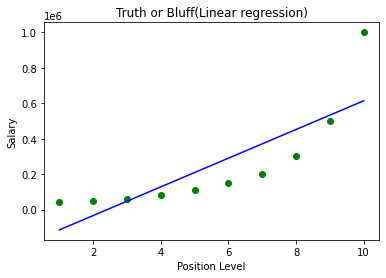

In [ ]:
#visualizing the linear regression results
import matplotlib.pyplot as plt
plt.scatter(x,y,color='green')
plt.plot(x,lr.predict(x),color='blue')
plt.title("Truth or Bluff(Linear regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

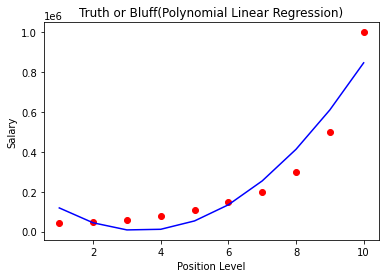

In [ ]:
#visualizing the polynomial linear regression results
plt.scatter(x,y,color='red')
plt.plot(x,lr_poly.predict(x_poly),color='blue')
plt.title('Truth or Bluff(Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#Retraining the polynomial regression model with degree=4 to get better results
poly_reg=PolynomialFeatures(degree=4)

In [ ]:
#fitting the features into the poly_reg model
x_poly=poly_reg.fit_transform(x)
lr_poly=LinearRegression()#this is for polynomial linear regression model
lr_poly.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

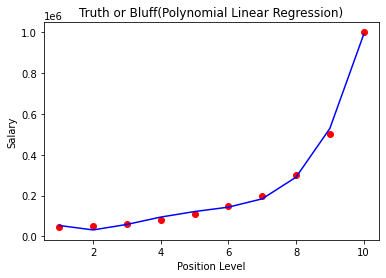

In [ ]:
#visualizing the polynomial linear regression(degree=4) results
plt.scatter(x,y,color='red')
plt.plot(x,lr_poly.predict(x_poly),color='blue')
plt.title('Truth or Bluff(Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#Visualising the polynomial regression results(for higher resolution and smoother curve)
x_grid=np.arange(min(x),max(x),0.1)
print(x_grid)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7
 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5
 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3
 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1
 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


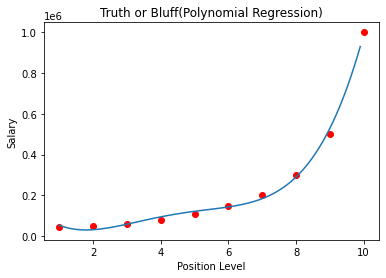

In [ ]:
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,lr_poly.predict(poly_reg.fit_transform(x_grid)))
plt.title('Truth or Bluff(Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [ ]:
#Predicting a new result with Linear regression
y_estimate_lr=lr.predict([[6.5]])

In [ ]:
print(y_estimate_lr)

[330378.78787879]


In [ ]:
#Predicting a new result with Polynomial regression
y_estimate_poly_lr=lr_poly.predict(poly_reg.fit_transform([[6.5]]))

In [ ]:
print(y_estimate_poly_lr)

[158862.45265155]
